### Support Vector Machine Tutorial Using Python Sklearn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
inputs = df.drop(['target','flower_name'], axis='columns')
df[98:103]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica


In [8]:
inputs = df.drop(['target','flower_name'], axis='columns')
inputs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
target = df.target
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [10]:
df0 = df[:50] # 'setosa', 
df1 = df[50:100] # 'versicolor',
df2 = df[100:] # 'virginica'

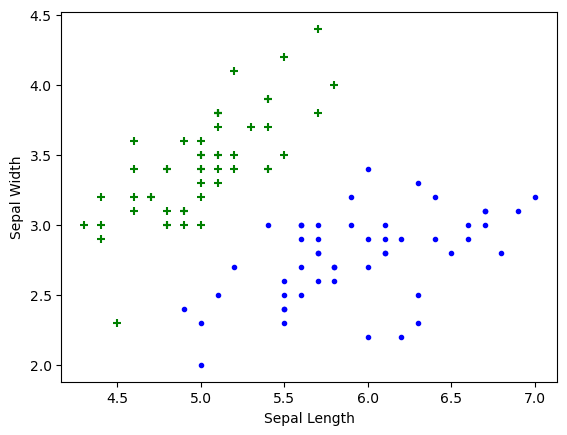

In [11]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

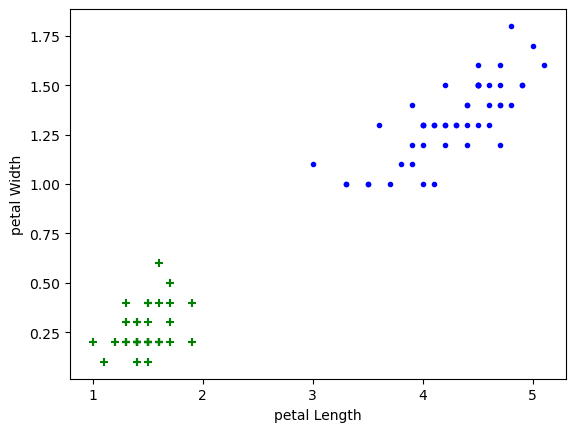

In [12]:
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [13]:
model = SVC()

In [26]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)
print(len(x_train))
len(x_test)

120


30

In [27]:
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
36,5.5,3.5,1.3,0.2
146,6.3,2.5,5.0,1.9
113,5.7,2.5,5.0,2.0
79,5.7,2.6,3.5,1.0


In [28]:
model.fit(x_train,y_train);

In [29]:
model.score(x_test,y_test)

0.9333333333333333

**Tune parameters**

**1. Regularization (C)**

In [30]:
model_C = SVC(C=1)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

0.9333333333333333

In [31]:
model_C = SVC(C=10)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

1.0

**2. Gamma**

In [32]:
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.9666666666666667

**3. Kernel**

In [33]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)

SVC(kernel='linear')

In [34]:
model_linear_kernal.score(x_test, y_test)

1.0